# Analyse des dialogues dans l'Avare de Molière

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request
from pathlib import Path
from xml.etree import ElementTree

L’[Observatoire de la vie littéraire (OBVIL)](http://obvil.sorbonne-universite.site/obvil/presentation) promeut une approche de l'analyse des textes littéraires fondée sur le numérique. Dans le cadre du Projet Molière, des pièces de cet auteur ont été numérisées et sont accessibles librement dans différents formats utilisables par un programme informatique.

Pour l'Avare de Molière, voici les formats disponibles : TEI, epub, kindle, markdown, Texte iramuteq, Texte dit/Paroles, TXM, html complet avec table des matières, fragment html.

Ici nous utilisons le format [TEI](https://fr.wikipedia.org/wiki/Text_Encoding_Initiative), plus approprier pour l'analyse des dialogues.

In [2]:
data_url = "https://dramacode.github.io/moliere/moliere_avare.xml"
data_file = "moliere_avare.xml"

Nous téléchargeons le fichier si il n'est pas disponible localement, cela est utile pour travailler sans acces internet ou dans le cas où les données changent ou deviennent inaccessibles.

In [3]:
 if not Path(data_file).exists():
    urllib.request.urlretrieve(data_url, data_file)

Nous chargeons le TEI dans un dataset pandas. Le fichier XML est composé de lignes de dialogue organisées en scene puis en acte. Le dataframe doit avoir la structure suivante :

| Colonne | Description                             |
| :------ | :-------------------------------------- |
| act     | L'acte dans lequel se passe le dialogue |
| scene   | La scene                                |
| dialog  | L'identifiant de la ligne de dialog     |
| speaker | La personne qui parle                   |
| text    | Le text du dialogue                     |

In [4]:
namespaces = {"ns0": "http://www.tei-c.org/ns/1.0", "xml": "http://www.w3.org/XML/1998/namespace"}
cols = ["act", "scene", "dialog", "speaker", "text"]
rows = []
  
# Parsing the XML file
tree = ElementTree.parse(data_file).getroot()

for act in tree.findall(".//*[@type='act']"):  # Use Xpath
    act_id = act.attrib['n']
    
    for scene in act.findall("*[@type='scene']"):
        scene_id = scene.attrib['n']
        
        for dialog in scene.findall("ns0:sp", namespaces=namespaces):
            dialog_id = dialog.attrib['{http://www.w3.org/XML/1998/namespace}id']
            speaker = dialog.attrib["who"]
            text = '\n'.join([sentence.text or '' for sentence in dialog.findall(".//ns0:s", namespaces=namespaces)])

            rows.append({
                "act": act_id,
                "scene": scene_id,
                "dialog": dialog_id,
                "speaker": speaker,
                "text": text
            })
  
data = pd.DataFrame(rows, columns=cols)
data

act scene  dialog         speaker  \
0     1     1   I01-1          valere   
1     1     1   I01-2           elise   
2     1     1   I01-3          valere   
3     1     1   I01-4           elise   
4     1     1   I01-5          valere   
5     1     1   I01-6           elise   
6     1     1   I01-7          valere   
7     1     1   I01-8           elise   
8     1     1   I01-9          valere   
9     1     1  I01-10           elise   
10    1     1  I01-11          valere   
11    1     1  I01-12           elise   
12    1     1  I01-13          valere   
13    1     1  I01-14           elise   
14    1     1  I01-15          valere   
15    1     1  I01-16           elise   
16    1     2   I02-1         cleante   
17    1     2   I02-2           elise   
18    1     2   I02-3         cleante   
19    1     2   I02-4           elise   
20    1     2   I02-5         cleante   
21    1     2   I02-6           elise   
22    1     2   I02-7         cleante   
23    1     2   I02-8           elise   
24    1     2   I02-9         cleante   
25    1     2  I02-10           elise   
26    1     2  I02-11         cleante   
27    1     2  I02-12           elise   
28    1     2  I02-13         cleante   
29    1     2  I02-14           elise   
..   ..   ...     ...             ...   
929   5     5  V05-39        harpagon   
930   5     5  V05-40          valere   
931   5     5  V05-41  maitre-jacques   
932   5     5  V05-42        harpagon   
933   5     5  V05-43          valere   
934   5     5  V05-44        harpagon   
935   5     6   V06-1         cleante   
936   5     6   V06-2        harpagon   
937   5     6   V06-3         cleante   
938   5     6   V06-4        harpagon   
939   5     6   V06-5         cleante   
940   5     6   V06-6         mariane   
941   5     6   V06-7         anselme   
942   5     6   V06-8        harpagon   
943   5     6   V06-9         cleante   
944   5     6  V06-10        harpagon   
945   5     6  V06-11         anselme   
946   5     6  V06-12        harpagon   
947   5     6  V06-13         anselme   
948   5     6  V06-14        harpagon   
949   5     6  V06-15         anselme   
950   5     6  V06-16     commissaire   
951   5     6  V06-17        harpagon   
952   5     6  V06-18     commissaire   
953   5     6  V06-19        harpagon   
954   5     6  V06-20  maitre-jacques   
955   5     6  V06-21         anselme   
956   5     6  V06-22        harpagon   
957   5     6  V06-23         anselme   
958   5     6  V06-24        harpagon   

                                                  text  
0    Hé quoi, charmante Élise, vous devenez mélanco...  
1    Non, Valère, je ne puis pas me repentir de tou...  
2    Hé que pouvez-vous craindre, Élise, dans les b...  
3    Hélas ! cent choses à la fois : L'emportement ...  
4    Ah ! ne me faites pas ce tort, de juger de moi...  
5    Ah ! Valère, chacun tient les mêmes discours.\...  
6    Puisque les seules actions font connaître ce q...  
7    Hélas ! qu'avec facilité on se laisse persuade...  
8                    Mais pourquoi cette inquiétude ?   
9    Je n'aurais rien à craindre, si tout le monde ...  
10   De tout ce que vous avez dit, ce n'est que par...  
11   Ah ! Valère, ne bougez d'ici, je vous prie ; e...  
12   Vous voyez comme je m'y prends, et les adroite...  
13   Mais que ne tâchez-vous aussi à gagner l'appui...  
14   On ne peut pas ménager l'un et l'autre ; et l'...  
15   Je ne sais si j'aurai la force de lui faire ce...  
16   Je suis bien aise de vous trouver seule, ma Sœ...  
17   Me voilà prête à vous ouïr, mon Frère. \nQu'av...  
18   Bien des choses, ma Sœur, enveloppées dans un ...  
19                                       Vous aimez ?   
20   Oui, j'aime.\nMais avant que d'aller plus loin...  
21   Vous êtes-vous engagé, mon Frère, avec celle q...  
22   Non ; mais j'y suis résolu ; et je vous conjur...  
23      Suis-je, mon Frère, une si étrange personne ?   
24   Non, ma Sœur, mais vous n'aimez

## Classification des personnages par temps de paroles
Nous commençons par indexé l'acte

In [5]:
sorted_data = data.set_index('dialog').sort_index()
sorted_data

act scene         speaker  \
dialog                             
I01-1    1     1          valere   
I01-10   1     1           elise   
I01-11   1     1          valere   
I01-12   1     1           elise   
I01-13   1     1          valere   
I01-14   1     1           elise   
I01-15   1     1          valere   
I01-16   1     1           elise   
I01-2    1     1           elise   
I01-3    1     1          valere   
I01-4    1     1           elise   
I01-5    1     1          valere   
I01-6    1     1           elise   
I01-7    1     1          valere   
I01-8    1     1           elise   
I01-9    1     1          valere   
I02-1    1     2         cleante   
I02-10   1     2           elise   
I02-11   1     2         cleante   
I02-12   1     2           elise   
I02-13   1     2         cleante   
I02-14   1     2           elise   
I02-15   1     2         cleante   
I02-16   1     2           elise   
I02-17   1     2         cleante   
I02-18   1     2           elise   
I02-19   1     2         cleante   
I02-2    1     2           elise   
I02-3    1     2         cleante   
I02-4    1     2           elise   
...     ..   ...             ...   
V05-44   5     5        harpagon   
V05-5    5     5         anselme   
V05-6    5     5        harpagon   
V05-7    5     5          valere   
V05-8    5     5        harpagon   
V05-9    5     5          valere   
V06-1    5     6         cleante   
V06-10   5     6        harpagon   
V06-11   5     6         anselme   
V06-12   5     6        harpagon   
V06-13   5     6         anselme   
V06-14   5     6        harpagon   
V06-15   5     6         anselme   
V06-16   5     6     commissaire   
V06-17   5     6        harpagon   
V06-18   5     6     commissaire   
V06-19   5     6        harpagon   
V06-2    5     6        harpagon   
V06-20   5     6  maitre-jacques   
V06-21   5     6         anselme   
V06-22   5     6        harpagon   
V06-23   5     6         anselme   
V06-24   5     6        harpagon   
V06-3    5     6         cleante   
V06-4    5     6        harpagon   
V06-5    5     6         cleante   
V06-6    5     6         mariane   
V06-7    5     6         anselme   
V06-8    5     6        harpagon   
V06-9    5     6         cleante   

                                                     text  
dialog                                                     
I01-1   Hé quoi, charmante Élise, vous devenez mélanco...  
I01-10  Je n'aurais rien à craindre, si tout le monde ...  
I01-11  De tout ce que vous avez dit, ce n'est que par...  
I01-12  Ah ! Valère, ne bougez d'ici, je vous prie ; e...  
I01-13  Vous voyez comme je m'y prends, et les adroite...  
I01-14  Mais que ne tâchez-vous aussi à gagner l'appui...  
I01-15  On ne peut pas ménager l'un et l'autre ; et l'...  
I01-16  Je ne sais si j'aurai la force de lui faire ce...  
I01-2   Non, Valère, je ne puis pas me repentir de tou...  
I01-3   Hé que pouvez-vous craindre, Élise, dans les b...  
I01-4   Hélas ! cent choses à la fois : L'emportement ...  
I01-5   Ah ! ne me faites pas ce tort, de juger de moi...  
I01-6   Ah ! Valère, chacun tient les mêmes discours.\...  
I01-7   Puisque les seules actions font connaître ce q...  
I01-8   Hélas ! qu'avec facilité on se laisse persuade...  
I01-9                   Mais pourquoi cette inquiétude ?   
I02-1   Je suis bien aise de vous trouver seule, ma Sœ...  
I02-10  Hélas ! mon Frère, ne parlons point de ma sage...  
I02-11   Ah ! plût au Ciel que votre âme comme la mienne…  
I02-12  Finissons auparavant votre affaire, et me dite...  
I02-13  Une jeune personne qui loge depuis peu en ces ...  
I02-14  J'en vois beaucoup, mon Frère, dans les choses...  
I02-15  J'ai découvert sous main, qu'elles ne sont pas...  
I02-16  Oui, je conçois assez, mon Frère, quel doit êt...  
I02-17  Ah ! ma Sœur, il est plus grand qu'on ne peut ...  
I02-18  Il est bien vrai que tous les jours il nous do...  
I02-19  J'entends sa voix. \nÉloignons-nous un peu, po... 

On affiche le nombre de dialog par personnages en regarder le nombre de ligne où ils apparaissent 

In [6]:
sorted_data['speaker'].value_counts()

harpagon          354
cleante           161
valere            101
maitre-jacques     85
la-fleche          66
frosine            60
elise              51
mariane            31
anselme            20
commissaire        17
la-merluche         5
maitre-simon        5
brindavoine         3
Name: speaker, dtype: int64

On regarde maintenant par acte / scene

In [7]:
sorted_data.groupby(['act', 'scene'])['speaker'].value_counts()

act  scene  speaker       
1    1      elise              8
            valere             8
     2      cleante           10
            elise              9
     3      harpagon          34
            la-fleche         33
     4      harpagon          53
            cleante           29
            elise             23
     5      valere            22
            harpagon          20
            elise              4
2    1      cleante           21
            la-fleche         20
     2      harpagon           9
            cleante            6
            maitre-simon       5
            la-fleche          1
     3      frosine            1
            harpagon           1
     4      la-fleche          6
            frosine            5
     5      frosine           35
            harpagon          35
3    1      harpagon          36
            maitre-jacques    27
            valere            11
            cleante            3
            la-merluche        2
            brin

## Nombre de mots de chaque personnage

On va rejouté une colonne pour visualiser le nombre de mots de chaque dialogue

In [8]:
sorted_data['word_count'] = sorted_data['text'].str.len()
sorted_data

act scene         speaker  \
dialog                             
I01-1    1     1          valere   
I01-10   1     1           elise   
I01-11   1     1          valere   
I01-12   1     1           elise   
I01-13   1     1          valere   
I01-14   1     1           elise   
I01-15   1     1          valere   
I01-16   1     1           elise   
I01-2    1     1           elise   
I01-3    1     1          valere   
I01-4    1     1           elise   
I01-5    1     1          valere   
I01-6    1     1           elise   
I01-7    1     1          valere   
I01-8    1     1           elise   
I01-9    1     1          valere   
I02-1    1     2         cleante   
I02-10   1     2           elise   
I02-11   1     2         cleante   
I02-12   1     2           elise   
I02-13   1     2         cleante   
I02-14   1     2           elise   
I02-15   1     2         cleante   
I02-16   1     2           elise   
I02-17   1     2         cleante   
I02-18   1     2           elise   
I02-19   1     2         cleante   
I02-2    1     2           elise   
I02-3    1     2         cleante   
I02-4    1     2           elise   
...     ..   ...             ...   
V05-44   5     5        harpagon   
V05-5    5     5         anselme   
V05-6    5     5        harpagon   
V05-7    5     5          valere   
V05-8    5     5        harpagon   
V05-9    5     5          valere   
V06-1    5     6         cleante   
V06-10   5     6        harpagon   
V06-11   5     6         anselme   
V06-12   5     6        harpagon   
V06-13   5     6         anselme   
V06-14   5     6        harpagon   
V06-15   5     6         anselme   
V06-16   5     6     commissaire   
V06-17   5     6        harpagon   
V06-18   5     6     commissaire   
V06-19   5     6        harpagon   
V06-2    5     6        harpagon   
V06-20   5     6  maitre-jacques   
V06-21   5     6         anselme   
V06-22   5     6        harpagon   
V06-23   5     6         anselme   
V06-24   5     6        harpagon   
V06-3    5     6         cleante   
V06-4    5     6        harpagon   
V06-5    5     6         cleante   
V06-6    5     6         mariane   
V06-7    5     6         anselme   
V06-8    5     6        harpagon   
V06-9    5     6         cleante   

                                                     text  word_count  
dialog                                                                 
I01-1   Hé quoi, charmante Élise, vous devenez mélanco...         326  
I01-10  Je n'aurais rien à craindre, si tout le monde ...        1170  
I01-11  De tout ce que vous avez dit, ce n'est que par...         727  
I01-12  Ah ! Valère, ne bougez d'ici, je vous prie ; e...         110  
I01-13  Vous voyez comme je m'y prends, et les adroite...        1105  
I01-14  Mais que ne tâchez-vous aussi à gagner l'appui...         119  
I01-15  On ne peut pas ménager l'un et l'autre ; et l'...         446  
I01-16  Je ne sais si j'aurai la force de lui faire ce...          62  
I01-2   Non, Valère, je ne puis pas me repentir de tou...         325  
I01-3   Hé que pouvez-vous craindre, Élise, dans les b...          76  
I01-4   Hélas ! cent choses à la fois : L'emportement ...         297  
I01-5   Ah ! ne me faites pas ce tort, de juger de moi...         219  
I01-6   Ah ! Valère, chacun tient les mêmes discours.\...         156  
I01-7   Puisque les seules actions font connaître ce q...         392  
I01-8   Hélas ! qu'avec facilité on se laisse persuade...         330  
I01-9                   Mais pourquoi cette inquiétude ?           33  
I02-1   Je suis bien aise de vous trouver seule, ma Sœ...         115  
I02-10  Hélas ! mon Frère, ne parlons point de ma sage...         201  
I02-11   Ah ! plût au Ciel que votre âme comme la mienne…          48  
I02-12  Finissons auparavant votre affaire, et me dite...          78  
I02-13  Une jeune personne qui loge depuis peu en ces ...         795  
I02-14  J'en vois beaucoup, mon Frère, dans les choses...         133  
I02-15  J'

On affiche a nouveau le tableau des dialogues par acte / scene mais en ajoutant le nombre de mots

In [9]:
word_count_by_speaker_by_scene = sorted_data.groupby(['act', 'scene', 'speaker'])['word_count'].sum()
word_count_by_speaker_by_scene

act  scene  speaker       
1    1      elise             2569
            valere            3324
     2      cleante           3985
            elise              779
     3      harpagon          2281
            la-fleche         1337
     4      cleante           1143
            elise              825
            harpagon          5768
     5      elise              209
            harpagon          1369
            valere            3486
2    1      cleante           1872
            la-fleche         4869
     2      cleante            711
            harpagon           901
            la-fleche           65
            maitre-simon       977
     3      frosine              9
            harpagon           106
     4      frosine            695
            la-fleche         1397
     5      frosine           7686
            harpagon          2803
3    1      brindavoine        117
            cleante            393
            elise               15
            harpagon        

On souhaite faire un histogramme par acte, on commence par transformer les données sous forme de table

In [10]:
word_count_table = word_count_by_speaker_by_scene.unstack(level=2)
word_count_table

speaker    anselme  brindavoine  cleante  commissaire   elise  frosine  \
act scene                                                                
1   1          NaN          NaN      NaN          NaN  2569.0      NaN   
    2          NaN          NaN   3985.0          NaN   779.0      NaN   
    3          NaN          NaN      NaN          NaN     NaN      NaN   
    4          NaN          NaN   1143.0          NaN   825.0      NaN   
    5          NaN          NaN      NaN          NaN   209.0      NaN   
2   1          NaN          NaN   1872.0          NaN     NaN      NaN   
    2          NaN          NaN    711.0          NaN     NaN      NaN   
    3          NaN          NaN      NaN          NaN     NaN      9.0   
    4          NaN          NaN      NaN          NaN     NaN    695.0   
    5          NaN          NaN      NaN          NaN     NaN   7686.0   
3   1          NaN        117.0    393.0          NaN    15.0      NaN   
    2          NaN          NaN      NaN          NaN     NaN      NaN   
    3          NaN          NaN      NaN          NaN     NaN    105.0   
    4          NaN          NaN      NaN          NaN     NaN   1022.0   
    5          NaN          NaN      NaN          NaN     NaN    128.0   
    6          NaN          NaN      NaN          NaN    83.0     60.0   
    7          NaN          NaN   2922.0          NaN     NaN    209.0   
    8          NaN         90.0      NaN          NaN     NaN      NaN   
    9          NaN          NaN    216.0          NaN     NaN      NaN   
4   1          NaN          NaN   1384.0          NaN   315.0   2222.0   
    2          NaN          NaN     65.0          NaN    16.0      NaN   
    3          NaN          NaN   2109.0          NaN     NaN      NaN   
    4          NaN          NaN    846.0          NaN     NaN      NaN   
    5          NaN          NaN    847.0          NaN     NaN      NaN   
    6          NaN          NaN     74.0          NaN     NaN      NaN   
    7          NaN          NaN      NaN          NaN     NaN      NaN   
5   1          NaN          NaN      NaN        607.0     NaN      NaN   
    2          NaN          NaN      NaN        825.0     NaN      NaN   
    3          NaN          NaN      NaN          NaN     NaN      NaN   
    4          NaN          NaN      NaN          NaN   747.0     27.0   
    5       2114.0          NaN      NaN          NaN     NaN      NaN   
    6        615.0          NaN    679.0        149.0     NaN      NaN   

speaker    harpagon  la-fleche  la-merluche  maitre-jacques  maitre-simon  \
act scene                                                                   
1   1           NaN        NaN          NaN             NaN           NaN   
    2           NaN        NaN          NaN             NaN           NaN   
    3        2281.0     1337.0          NaN             NaN           NaN   
    4        5768.0        NaN          NaN             NaN           NaN   
    5        1369.0        NaN          NaN             NaN           NaN   
2   1           NaN     4869.0          NaN             NaN           NaN   
    2         901.0       65.0          NaN             NaN         977.0   
    3         106.0        NaN          NaN             NaN           NaN   
    4           NaN     1397.0          NaN             NaN           NaN   
    5        2803.0        NaN          NaN             NaN           NaN   
3   1        3949.0        NaN        152.0          4005.0           NaN   
    2           NaN        NaN          NaN           943.0           NaN   
    3           NaN        NaN          NaN            47.0           NaN   
    4           NaN        NaN          NaN             NaN           NaN   
    5         546.0        NaN          NaN             NaN           NaN   
    6         368.0        NaN          NaN             NaN           NaN   
    7         972.0        NaN          NaN             NaN           NaN   
    8         115.0 

On trace l'histogramme

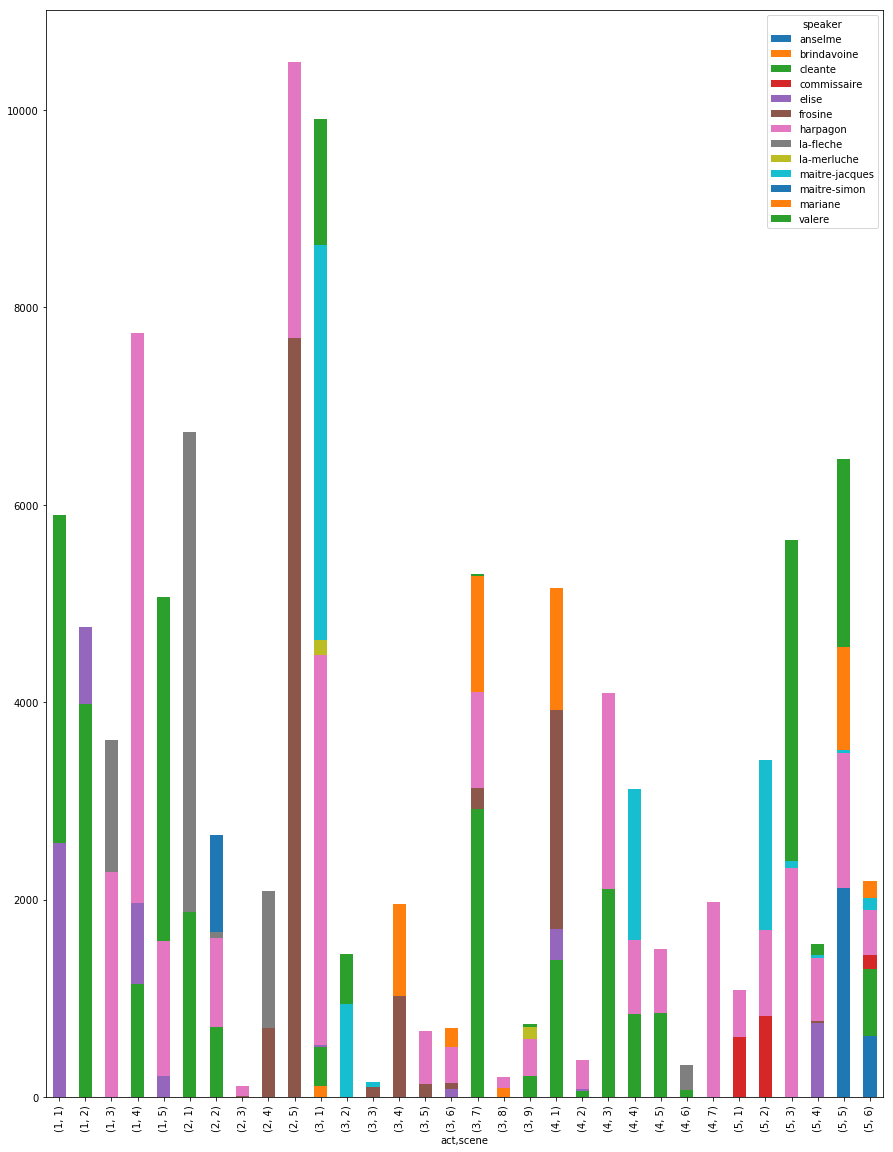

In [11]:
word_count_table.plot.bar(stacked=True, figsize = (15,20))

Le graphique montre la repartition du nombre de mots par personnage au cours des scenes